In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME = 'Stu/stan/CS231N/project'
FOLDERNAME1 = 'Stu/stan/CS231N/project/WebsiteScreenshots_v1_raw_coco'
assert FOLDERNAME is not None, "[!] Enter the foldername."
assert FOLDERNAME1 is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This downloads the CIFAR-10 dataset to your Drive
# if it doesn't already exist.
%cd /content/drive/My\ Drive/$FOLDERNAME1/


Mounted at /content/drive
/content/drive/My Drive/Stu/stan/CS231N/project/WebsiteScreenshots_v1_raw_coco


In [ ]:
!pip install numpy
!pip install opencv-python
!pip install matplotlib
!pip install  glob2
!pip install scikit-image

In [2]:
#!cd C:\\Users\\vixpa\\Downloads
!dir

README.roboflow.txt  test  train  try  valid


In [3]:

import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import os
#from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform


In [4]:
#train_dir = 'Downloads\prj\WebsiteScreenshots_v1_raw_coco/train/'
train_dir = '/content/drive/My Drive/Stu/stan/CS231N/project/WebsiteScreenshots_v1_raw_coco/train/'

1
2
3
4
5
0
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


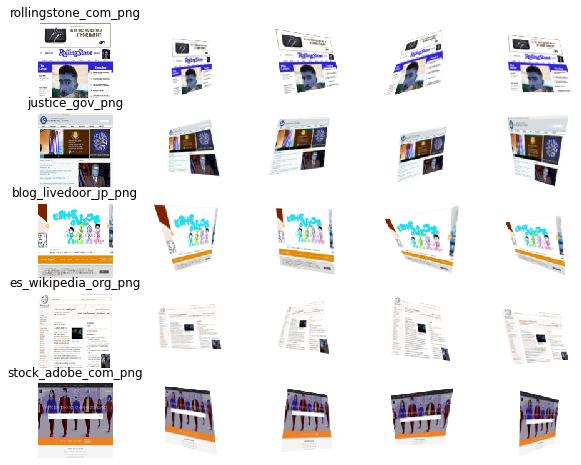

In [8]:


scale=1.0
rotation = 180
#print(img.shape)
dim = (120,120)
distort = 0.3
S = 5

path_root = train_dir + '../../aug/'
if not os.path.exists(path_root+"train"):
 os.mkdir(path_root+"train")
path_root += 'train/'
cnt = 0
set = 0
if not os.path.exists(path_root+"set_"+str(set)):
  os.mkdir(path_root+"set_"+str(set))

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

for file_name in os.listdir(train_dir):
    f = file_name.split(".")[0].lower()
    if (file_name.split(".")[-1].lower() != "jpg"):
        print(file_name)
        continue
    img = cv2.imread(train_dir + file_name)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    #cv2_imshow(img)
    #new code
    rect = np.zeros((4, 2), dtype = "float32")
    rect1 = np.zeros((4, 2), dtype = "float32")
    rect[0] = [0,0]
    rect[1] = [img.shape[1] - 1, 0]
    rect[2] = [img.shape[1] - 1, img.shape[0] - 1]
    rect[3] = [0, img.shape[0] - 1]
    ht = img.shape[0] - 1 
    wi = img.shape[1] - 1
    if not os.path.exists(path_root+"set_" + str(set) + "/"+f):
      os.mkdir(path_root+"set_" + str(set) + "/"+f)
    #print(rect)
    path_loc = path_root + "set_" + str(set) + "/" + f + "/"
    #print(path_loc)
    for i in range(10):
      r = np.random.uniform(0,distort,8)
      rect1[0] = [r[0]*ht,r[1]*wi]
      rect1[1] = [img.shape[1] - 1 - r[2]*ht , r[3]*wi]
      rect1[2] = [img.shape[1] - 1 - r[4]*ht, img.shape[0] - 1 - r[5]*wi]
      rect1[3] = [r[6]*ht, img.shape[0] - 1 - r[7]*wi]
      M = cv2.getPerspectiveTransform(rect, rect1);
      img1 = cv2.warpPerspective(	img, M, (ht,wi), cv2.INTER_LINEAR, borderValue=(255, 255, 255)	) 
      #M = cv2.getPerspectiveTransform(rect1, rect);
      #img1 = cv2.warpPerspective(	img1, M, (ht,wi), cv2.INTER_LINEAR, borderValue=(255, 255, 255)	) 
      #cv2_imshow(img1)
      #print(path_loc + f + "_" + str(i) + ".jpg")
      img1 = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA)
      ret = cv2.imwrite(path_loc + f + "_" + str(i) + ".jpg",img1)
      #print(cnt, ret)
      if ret == False:
        exit()
      if(cnt<5 and i <5):
        plt_idx = 5*cnt + i + 1
        plt.subplot(5, 5, plt_idx)
        print(plt_idx)
        if i == 0:
          plt.imshow(img.astype('uint8'))
        else:
          plt.imshow(img1.astype('uint8'))
        plt.axis('off')
        if i == 0:
              plt.title(f)
      #print(M)
    if cnt % 10 == 0:
      print(cnt)
      #break
      if cnt % 50 ==0 and cnt > 1:
        set += 1
        if not os.path.exists(path_root+"/set_"+str(set)):
          os.mkdir(path_root+"/set_"+str(set))
    if cnt == 5:
      break
    cnt += 1 
#plt.tight_layout()
#plt.show()  
    #break
    #if file_name.split(".")[-1].lower() in {"jpeg", "jpg", "png"}:
    #    print(file_name)
    #    img = cv2.imread("/path/to/your/directory/" + file_name)

In [ ]:
test_dir = 'Downloads\prj\WebsiteScreenshots_v1_raw_coco/test/'
#train_dir = '/content/drive/My Drive/Stu/stan/CS231N/project/WebsiteScreenshots_v1_raw_coco/train/'

In [ ]:

scale=1.0
rotation = 180
#print(img.shape)
dim = (105,105)
distort = 0.3

path_root = test_dir + '../../aug/'
!rm -rf /content/drive/My Drive/Stu/stan/CS231N/project/WebsiteScreenshots_v1_raw_coco/test/
if not os.path.exists(path_root+"test"):
 os.mkdir(path_root+"test")
path_root += 'test/'
cnt = 0
set = 0
if not os.path.exists(path_root+"set_"+str(set)):
  os.mkdir(path_root+"set_"+str(set))
for file_name in os.listdir(test_dir):
    f = file_name.split(".")[0].lower()
    if (file_name.split(".")[-1].lower() != "jpg"):
        print(file_name)
        continue
    img = cv2.imread(test_dir + file_name)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    #cv2_imshow(img)
    #new code
    rect = np.zeros((4, 2), dtype = "float32")
    rect1 = np.zeros((4, 2), dtype = "float32")
    rect[0] = [0,0]
    rect[1] = [img.shape[1] - 1, 0]
    rect[2] = [img.shape[1] - 1, img.shape[0] - 1]
    rect[3] = [0, img.shape[0] - 1]
    ht = img.shape[0] - 1 
    wi = img.shape[1] - 1
    if not os.path.exists(path_root+f):
      os.mkdir(path_root+"set_" + str(set) + "/"+f)
    #print(rect)
    path_loc = path_root + "set_" + str(set) + "/" + f + "/"
    #print(path_loc)
    for i in range(10):
      r = np.random.uniform(0,distort,8)
      rect1[0] = [r[0]*ht,r[1]*wi]
      rect1[1] = [img.shape[1] - 1 - r[2]*ht , r[3]*wi]
      rect1[2] = [img.shape[1] - 1 - r[4]*ht, img.shape[0] - 1 - r[5]*wi]
      rect1[3] = [r[6]*ht, img.shape[0] - 1 - r[7]*wi]
      M = cv2.getPerspectiveTransform(rect, rect1);
      img1 = cv2.warpPerspective(	img, M, (ht,wi), cv2.INTER_LINEAR, borderValue=(255, 255, 255)	) 
      M = cv2.getPerspectiveTransform(rect1, rect);
      img1 = cv2.warpPerspective(	img1, M, (ht,wi), cv2.INTER_LINEAR, borderValue=(255, 255, 255)	) 
      img1 = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA)
      #cv2_imshow(img1)
      #print(path_loc + f + "_" + str(i) + ".jpg")
      ret = cv2.imwrite(path_loc + f + "_" + str(i) + ".jpg",img1)
      if ret == False:
        exit()
      #print(M)
    if cnt % 10 == 0:
      print(cnt)
      #break
      if cnt % 50 ==0 and cnt > 1:
        set += 1
        if not os.path.exists(path_root+"/set_"+str(set)):
          os.mkdir(path_root+"/set_"+str(set))
    #if cnt > 5:
      #break
    cnt += 1 
    
    #break
    #if file_name.split(".")[-1].lower() in {"jpeg", "jpg", "png"}:
    #    print(file_name)
    #    img = cv2.imread("/path/to/your/directory/" + file_name)


'rm' is not recognized as an internal or external command,
operable program or batch file.


0
10
20
30
40
50
60
70
80
90
100
110
120
_annotations.coco.json


In [ ]:
valid_dir = '/content/drive/My Drive/Stu/stan/CS231N/project/WebsiteScreenshots_v1_raw_coco/valid/'

scale=1.0
rotation = 180
#print(img.shape)
dim = (105,105)
distort = 0.3

path_root = valid_dir + '../../aug/'
if not os.path.exists(path_root+"valid"):
 os.mkdir(path_root+"valid")
path_root += 'valid/'
cnt = 0
set = 0
if not os.path.exists(path_root+"set_"+str(set)):
  os.mkdir(path_root+"set_"+str(set))
for file_name in os.listdir(valid_dir):
    f = file_name.split(".")[0].lower()
    if (file_name.split(".")[-1].lower() != "jpg"):
        print(file_name)
        continue
    img = cv2.imread(valid_dir + file_name)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    #cv2_imshow(img)
    #new code
    rect = np.zeros((4, 2), dtype = "float32")
    rect1 = np.zeros((4, 2), dtype = "float32")
    rect[0] = [0,0]
    rect[1] = [img.shape[1] - 1, 0]
    rect[2] = [img.shape[1] - 1, img.shape[0] - 1]
    rect[3] = [0, img.shape[0] - 1]
    ht = img.shape[0] - 1 
    wi = img.shape[1] - 1
    if not os.path.exists(path_root+f):
      os.mkdir(path_root+"set_" + str(set) + "/"+f)
    #print(rect)
    path_loc = path_root + "set_" + str(set) + "/" + f + "/"
    #print(path_loc)
    for i in range(20):
      r = np.random.uniform(0,distort,8)
      rect1[0] = [r[0]*ht,r[1]*wi]
      rect1[1] = [img.shape[1] - 1 - r[2]*ht , r[3]*wi]
      rect1[2] = [img.shape[1] - 1 - r[4]*ht, img.shape[0] - 1 - r[5]*wi]
      rect1[3] = [r[6]*ht, img.shape[0] - 1 - r[7]*wi]
      M = cv2.getPerspectiveTransform(rect, rect1);
      img1 = cv2.warpPerspective(	img, M, (ht,wi), cv2.INTER_LINEAR, borderValue=(255, 255, 255)	) 
      img1 = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA)
      #cv2_imshow(img1)
      #print(path_loc + f + "_" + str(i) + ".jpg")
      img1 = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA)
      ret = cv2.imwrite(path_loc + f + "_" + str(i) + ".jpg",img1)
      if ret == False:
        exit()
      #print(M)
    if cnt % 10 == 0:
      print(cnt)
      if cnt % 50 ==0 and cnt > 1:
        set += 1
        if not os.path.exists(path_root+"/set_"+str(set)):
          os.mkdir(path_root+"/set_"+str(set))
    #if cnt > 150:
      #break
    cnt += 1 

0
10
20
30
40
50
60
70
80
90
100
110
120
130
_annotations.coco.json
140
150
160
170
180
190
200
210
220
230
240
